<a href="https://colab.research.google.com/github/wjdxorwns/mystudy/blob/dev/milkdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving milknew.csv to milknew.csv


In [ ]:
import io
import pandas as pd

milk_df = pd.read_csv(r'/content/milknew.csv')

In [ ]:
milk_df.shape

(1059, 8)

In [ ]:
milk_df.shape

(1059, 8)

In [ ]:
milk_df.shape

(1059, 8)

In [ ]:
# 독립변수와 종속변수 분리
X = milk_df[['pH', 'Temprature','Colour']]
Y = pd.DataFrame(milk_df['Taste'])

In [ ]:
# 학습 데이터, 테스트 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(741, 3) (318, 3) (741, 1) (318, 1)


In [ ]:
import sklearn.preprocessing as preprocessing
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# 변수 값 정규화
preprocessor = preprocessing.Normalizer()
X_train_kr = preprocessor.fit_transform(X_train)
X_test_kr = preprocessor.transform(X_test)

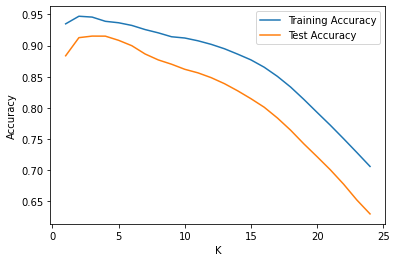

In [ ]:
training_rsquare = []
test_rsquare = []
# 여러 k값에 대한 모델 생성 n_neighbors 를 적용
k_settings = range(1, 25)

for k in k_settings:ㄴ
    # 모델 생성
    corolla_knn = KNeighborsRegressor(n_neighbors=k)
    corolla_knn.fit(X_train_kr, Y_train)
    # 훈련 세트 정확도 저장
    training_rsquare.append(corolla_knn.score(X_train_kr, Y_train))
    # 일반화 정확도 저장
    test_rsquare.append(corolla_knn.score(X_test_kr, Y_test))

# K의 변황량에 따른 예측정확도 성능 비교
plt.plot(k_settings, training_rsquare, label="Training Accuracy")
plt.plot(k_settings, test_rsquare, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.legend()

In [ ]:
# 최적의 K 판단
from itertools import compress
best_k_temp = test_rsquare==max(test_rsquare)
best_k = list(compress(k_settings, best_k_temp))[0]
print('최적의 K값:', best_k)

최적의 K값: 3


In [ ]:
# 최적의 K값에서 테스트 데이터의 Y예측값
best_corolla_knn = KNeighborsRegressor(n_neighbors=best_k)
best_corolla_knn.fit(X_train_kr, Y_train)
Y_predict_kr = best_corolla_knn.predict(X_test_kr)
print(Y_predict_kr)

[[1.        ]
 [1.        ]
 [0.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [1.        ]
 [0.33333333]
 [0.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [1.        ]
 [1.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [1.        ]
 [1.        ]
 [0.        ]
 [1.        ]
 [1.        ]
 [0.        ]
 [0.66

#### Linear Regression

In [ ]:
import statsmodels.api as sm

In [ ]:
# intercept 추가
milk_df = sm.add_constant(milk_df, has_constant='add')
milk_df.head()

,const,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,1.0,6.6,35,1,0,1,0,254,high
1,1.0,6.6,36,0,1,0,1,253,high
2,1.0,8.5,70,1,1,1,1,246,low
3,1.0,9.5,34,1,1,0,1,255,low
4,1.0,6.6,37,0,0,0,0,255,medium


In [ ]:
lm = sm.OLS(Y_train, X_train)
lm_train = lm.fit()

In [ ]:
lm_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Taste   R-squared (uncentered):                   0.533
Model:                            OLS   Adj. R-squared (uncentered):              0.531
Method:                 Least Squares   F-statistic:                              281.2
Date:                Sun, 20 Nov 2022   Prob (F-statistic):                   1.14e-121
Time:                        14:21:49   Log-Likelihood:                         -535.02
No. Observations:                 741   AIC:                                      1076.
Df Residuals:                     738   BIC:                                      1090.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pH            -0.0069      0.014     -0.514      0.608      -0.033       0.020
Temprature    -0.0035      0.002     -1.871      0.062      -0.007       0.000
Colour         0.0029      0.000      6.841      0.000       0.002       0.004
==============================================================================
Omnibus:                     2967.851   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.996
Skew:                          -0.124   Prob(JB):                     8.77e-27
Kurtosis:                       1.044   Cond. No.                         189.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Y_predict_lr = lm_train.predict(X_test)
print(Y_predict_lr)

509     11395.230598
435     10444.359594
321     13155.675485
1055     6221.670002
288     12817.268153
            ...     
1430     8033.311123
868     10398.185015
478     10904.273061
1173     7113.896685
419      9708.545653
Length: 431, dtype: float64
